# Ordianry Differential Equations (ODEs) Quiz

*Instructions* - Download and/or copy this notebook to your code repository. Complete the blank items in code ceels to get the desired value(s). Save and upload (or push) to github when finished. 

In [1]:
#import required packages
import numpy as np
from scipy.optimize import brentq
from scipy.integrate import solve_ivp

## Part 1: Euler's Method (IVP)

Consider the function below that computes the solution to an initial value problem (IVP) using Euler's method. 

In [2]:
def euler_method(f, t_span, y0, h):
    """
    Euler's method for solving dy/dt = f(t, y).
    
    Parameters:
        f      : function f(t, y) defining the ODE
        t_span : tuple (t_start, t_end)
        y0     : initial condition
        h      : step size
    
    Returns:
        t_vals : array of time points
        y_vals : array of solution values
    """
    
    t_start, t_end = t_span
    t_vals = np.arange(t_start, t_end + h, h)
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = y0
    
    for i in range(len(t_vals) - 1):

        y_vals[i + 1] =  y_vals[i] + f(t_vals[i], y_vals[i]) * h
    
    return t_vals, y_vals


Use the code above to solve the initial value problem: 
$$
\frac{dy}{dt}= -2y + e^{-t}
$$

with $ y(0) = 1$ over the interval $[0, 3]$ in $t$ using Euler's method. Check your answer against the analytic solution to verify that it is working correctly. 

In [3]:
#define function
def f(t,y):
    return -2*y + np.exp(-t)

#call euler method
t_euler, y_euler = euler_method(f, (0, 3), 1, 0.1)

#create array for the analytic solution
y_analytic = np.exp(-t_euler)

#determine error
error = np.max(np.abs(y_euler - y_analytic))

if error < 0.15:  # Euler is first-order, expect some error
    print(f"✓ Good Job! - Max error: {error:.6f}")
else:
    print(f"✗ Not quite. try again... - Max error: {error:.6f} (expected < 0.15)")

✓ Good Job! - Max error: 0.013237


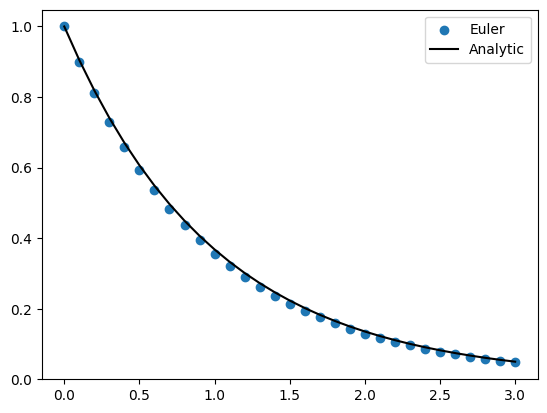

In [10]:
import matplotlib.pyplot as plt
plt.scatter(t_euler, y_euler, label="Euler")
plt.plot(t_euler, y_analytic, label="Analytic", color="black")
plt.legend()
plt.show()

## Part 2: Runge-Kutta Method (RK4)

Consider the function below that implements 4th order Runge-Kutta method

In [8]:
def rk4_method(f, t_span, y0, h):
    """4th-order Runge-Kutta method for solving dy/dt = f(t, y)."""
    t_start, t_end = t_span
    t_vals = np.arange(t_start, t_end + h, h)
    y_vals = np.zeros(len(t_vals))
    y_vals[0] = y0
    
    for i in range(len(t_vals) - 1):
        t_n = t_vals[i]
        y_n = y_vals[i]
        
        k1 = f(t_n, y_n)
        
        k2 = f(t_n + h/2, y_n + h*k1/2)
        
        k3 = f(t_n + h/2, y_n + h*k2/2)
        
        k4 = f(t_n + h, y_n + h*k3)
        
        y_vals[i + 1] = y_n + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    
    return t_vals, y_vals

Use the `rk4_method` function to solve the ODE defined in part 1 with $ y(0) = 1$ over the interval $[0, 3]$. Check your answer against the analytic solution to verify that it is working correctly. 

In [9]:
#call rk4 method
t_rk4, y_rk4 = rk4_method(f, (0, 3), 1, 0.1)

#create array for the analytic solution
y_analytic = np.exp(-t_rk4)

#determine error
error = np.max(np.abs(y_rk4 - y_analytic))

if error < 1e-4:  # rk4 is more accurate and should have lower error compared to euler
    print(f"✓ Good Job! - Max error: {error:.6f}")
else:
    print(f"✗ Not quite. try again... - Max error: {error:.6f}")

✓ Good Job! - Max error: 0.000002


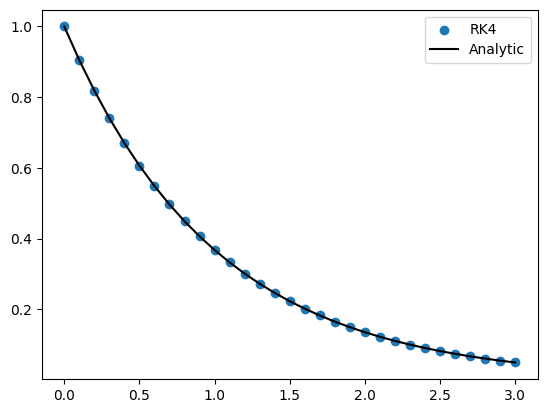

In [12]:
import matplotlib.pyplot as plt
plt.scatter(t_euler, y_rk4, label="RK4")
plt.plot(t_euler, y_analytic, label="Analytic", color="black")
plt.legend()
plt.show()

## Part 3: Shooting Method - BVP

Consider the functions below which use the shooting method to solve a boundary value problem (BVP)

In [13]:
#function to calculate the residual of a single 'shot'
def shooting_method_residual(s, ode_system, t_span, y0_fixed, y_target_idx, y_target):
    """Compute the residual for the shooting method."""
    u0 = [y0_fixed, s]
    
    sol = solve_ivp(ode_system, t_span, u0, dense_output=True)
    
    y_end = sol.y[y_target_idx, -1]
    
    residual = y_end - y_target

    return residual

def solve_bvp_shooting(ode_system, t_span, y0_fixed, y_target, s_bracket):
    """Solve a BVP using the shooting method."""
    def residual(s):
        return shooting_method_residual(s, ode_system, t_span, y0_fixed, 0, y_target)
    
    s_solution = brentq(residual, s_bracket[0], s_bracket[1])
    u0 = [y0_fixed, s_solution]
    sol = solve_ivp(ode_system, t_span, u0, dense_output=True, max_step=0.01)
    
    return sol.t, sol.y[0], s_solution

For this part, we will consider a differential equation of the form:
$$
y'' + 4y = 0
$$

which we will transform into a system of first order equations of the form
$ u = [y, y']$ with:
$$
\frac{du_0}{dt} = \frac{dy}{dt} = y' = u_1
$$
and
$$
\frac{du_1}{dt} = \frac{dy'}{dt} = y'' = -4y = -4 u_0
$$

For boundary conditions, we will adopt $y(t_{initial}) = y(t_{final}) = 0$. 

In [14]:
#define function to solve
def ode_shoot(t, u):
    return [u[1], -u[0]]

#calculate residual from shooting method
res = shooting_method_residual(1.0, ode_shoot, (0, np.pi), 0.0, 0, 0.0)
                               
#check if accuracy meets expected performance
if res < 1e-3: 
    print(f"✓ Good Job! - Residual with s=1: {res:.6e} ")
else:
    print(f"✗ Not quite. try again... - Residual: {res:.6f} ")

✓ Good Job! - Residual with s=1: -5.877484e-04 


## Part 4: Finite Difference 

Recall that the finite difference approach approximates $y''$ as:

$$
y''_i ≈ \frac{y_{i-1} - 2*y_i + y_{i+1}}{h^2}
$$

For this problem, we want to form $-y''$ as an eigenvalue problem (A*y = λ*y) where A ≈ -d²/dx². 
By construction, the main diagonal coefficient is $+2/h^2$, and the off-diagonal coefficients are $-1/h^2$

Consider the function below that implements finite difference as a eigenvalue-type problem similar to the method described above. 

In [32]:
def construct_fd_matrix(N, h):
    """Construct the finite difference matrix for -y'' on N interior points."""
    
    main_diag = 2 / h**2
    off_diag = -1 / h**2
    
    A = np.diag(main_diag * np.ones(N)) + np.diag(off_diag * np.ones(N - 1), k=1) + np.diag(off_diag * np.ones(N - 1), k=-1)
    
    return A

def solve_eigenvalue_bvp(L, N):
    """Solve y'' + λy = 0 with y(0) = y(L) = 0."""
    h = L / (N + 1)
    x = np.linspace(h, L - h, N)
    A = construct_fd_matrix(N, h)

    eigenvalues, eigenvectors = np.linalg.eigh(A)
    
    return x, eigenvalues, eigenvectors

For this part, we will use the same Boundary Value Problem definined in part 3 (Shooting Method), but supply a little more context to justify usage of the eigenvalue approach. Suppose the given equation is representative of a mass-spring system undergoing simple harmonic motion. In this view, the eigenvalues are representative of harmoic frequencies that the system can osillate at. Use the finite difference method defined above to find these frequencies and compare with the known analytic solution. 

In [35]:
#define parameters
L = np.pi #x_end
N = 50 #number of 'steps' to use

# use function to solve BVP as eigenvalue problem
x, eigenvalues, eigenvectors = solve_eigenvalue_bvp(L, N)
        
#exact known eigenvalues
lambda_1_exact = 1.0
lambda_2_exact = 4.0
 
#calculate errors in the eigenvalues    
error_1 = np.abs(eigenvalues[0] - lambda_1_exact)
error_2 = np.abs(eigenvalues[1] - lambda_2_exact)

if error_1 < 0.01 and error_2 < 0.05:
    print(f"✓ PASSED - λ₁ = {eigenvalues[np.argmin(eigenvalues)]:.4f} (exact: 1.0)")
    print(f"           λ₂ = {eigenvalues[np.argmin(eigenvalues) + 1]:.4f} (exact: 4.0)")
else:
    print(f"✗ Try Again! - λ₁ = {eigenvalues[0]:.4f}, λ₂ = {eigenvalues[1]:.4f}")


✓ PASSED - λ₁ = 0.9997 (exact: 1.0)
           λ₂ = 3.9949 (exact: 4.0)


If you have gotten to this point and have recieved the 'PASSED' message on all problems, you are done. Be sure to add this completed notebook to your github repo for credit. 